# Explore here

In [3]:
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical


2024-04-11 23:29:28.140761: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-11 23:29:28.145263: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-11 23:29:28.190715: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-11 23:29:31.699269: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:

# Define the directories for train and test data
train_dir = "/workspaces/neural-networks/data/raw/train"
test_dir = "/workspaces/neural-networks/data/raw/test"
validation_dir = "/workspaces/neural-networks/data/raw/validation"

# Function to split images into subdirectories based on class
def split_into_subdirectories(directory):
    # Get the list of image files in the directory
    image_files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]

    # Create subdirectories for each class
    for image_file in image_files:
        # Determine the class label based on the filename
        class_label = "dog" if "dog" in image_file else "cat"

        # Create the subdirectory if it doesn't exist
        class_dir = os.path.join(directory, class_label)
        os.makedirs(class_dir, exist_ok=True)

        # Move the image file to the corresponding subdirectory
        src = os.path.join(directory, image_file)
        dst = os.path.join(class_dir, image_file)
        shutil.move(src, dst)

# Split train data into subdirectories
split_into_subdirectories(train_dir)

# Split test data into subdirectories
split_into_subdirectories(test_dir)

# Split validation data into subdirectories
split_into_subdirectories(validation_dir)


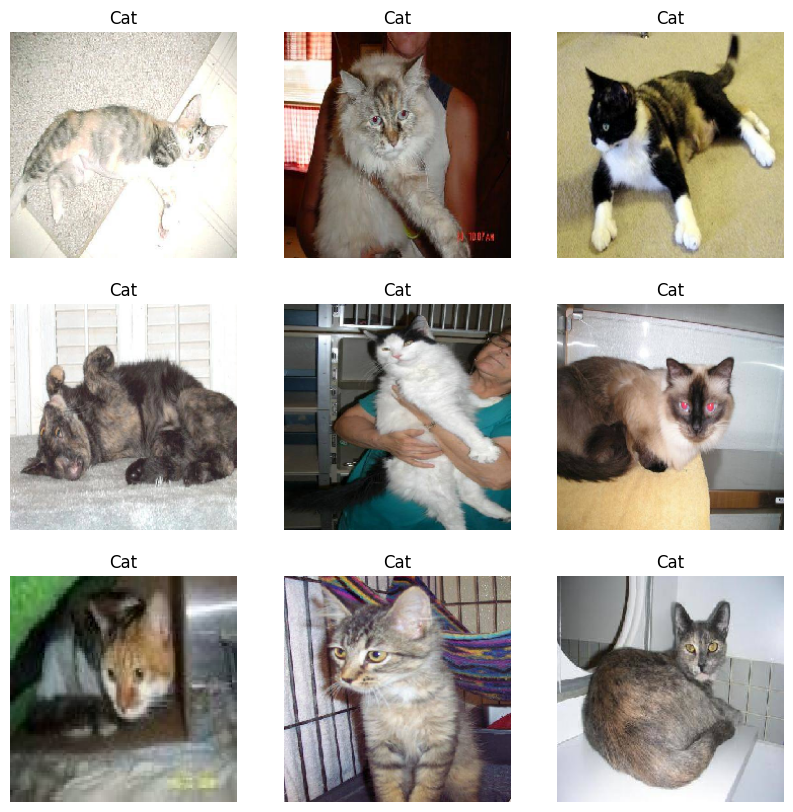

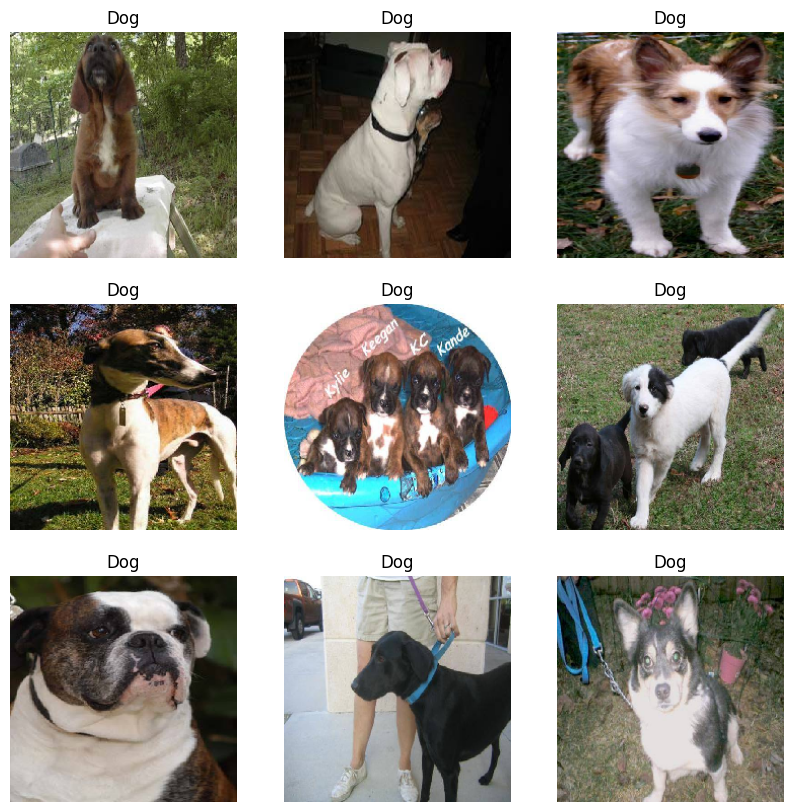

In [5]:
# Define the directories for cat and dog images
cat_dir = '/workspaces/neural-networks/data/raw/train/cat/'
dog_dir = '/workspaces/neural-networks/data/raw/train/dog/'

# Get the file names for cats and dogs
cat_files = [cat_dir + filename for filename in os.listdir(cat_dir)][:9]
dog_files = [dog_dir + filename for filename in os.listdir(dog_dir)][:9]

# Function to display images
def display_images(image_files, title):
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        img = image.load_img(image_files[i], target_size=(224, 224))
        ax.imshow(img)
        ax.set_title(title)
        ax.axis('off')
    plt.show()

# Display the first nine images of cats
display_images(cat_files, 'Cat')

# Display the first nine images of dogs
display_images(dog_files, 'Dog')


In [6]:


# Define the directories for train and test data
train_dir = "../data/raw/train"
test_dir = "../data/raw/test"
validation_dir = "../data/raw/validation"

# Define a few rules for DataGen
image_size = (200, 200)
batch_size = 16

datagentrain = ImageDataGenerator(rescale=1./255)  # Rescale pixel values to [0, 1]
datagentest = ImageDataGenerator(rescale=1./255)
datagenvalidation = ImageDataGenerator(rescale=1./255)

# Train Data Generation
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'  # Use 'categorical' for one-hot encoding
)

# Test Data Generation
test_data = datagentest.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Validation Data Generation
validation_data = datagenvalidation.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 153 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [7]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# model = Sequential([
#     Conv2D(input_shape=(224, 224, 3), filters=64, kernel_size=(3, 3), padding="same", activation="relu"),
#     Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"),
#     MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
#     Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"),
#     Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"),
#     MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
#     Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"),
#     Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"),
#     Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"),
#     MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
#     Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"),
#     Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"),
#     Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"),
#     MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
#     Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"),
#     Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"),
#     Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"),
#     MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
#     Flatten(),
#     Dense(units=4096, activation="relu"),
#     Dense(units=4096, activation="relu"),
#     Dense(units=2, activation="softmax")
# ])



In [8]:

model = Sequential([
    Conv2D(input_shape=(200, 200, 3), filters=64, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Flatten(),
    Dense(units=4096, activation="relu"),
    Dense(units=4096, activation="relu"),
    Dense(units=2, activation="softmax")
])


/home/vscode/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
train_labels = to_categorical(train_data.classes)
validation_labels = to_categorical(validation_data.classes)

# Train the model
history = model.fit(
    train_data,
    epochs=10,
    validation_data=(validation_data, validation_labels),  # Provide validation labels
    verbose=1
)


# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


Epoch 1/10


/home/vscode/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


: 